# Let's plot some vowel spaces!

## Get the code set up

### Run everything in this section first!
In the next sections we'll
1. Import data
2. Visualize some examples
3. Normalize the data 


In [1]:
#Import libraries

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

In [2]:
def vowelplot (vowelcsv, color=None, F1="F1", F2="F2", vowel = "Vowel", title="Vowel Plot", unit="Hz", logscale=False):
    #Set some parameters for the chart itself
    sns.set(style='ticks', context='talk')
    plt.figure(figsize=(10,10))
    
    # If there's an argument for color, determine whether it's likely to be categorical
    ## If it's a string (text), use a categorical color palette
    ## If it's a number, use a sequential color palette
    if color != None:
        if type(vowelcsv[color].iloc[0])==str:
            pal="husl"
        else:
            pal="viridis"
            
        pl = sns.scatterplot(x=F2,y=F1,hue=color,data=vowelcsv,palette=pal)
        
    # If no color argument is given, don't specify hue, and no palette needed
    else:
        pl = sns.scatterplot(x=F2,y=F1, data=vowelcsv)
    
    
    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()
    
    #Add unit to the axis labels
    F1name=str("F1 ("+unit+")")
    F2name=str("F2 ("+unit+")")
    laby=plt.ylabel(F1name)
    labx=plt.xlabel(F2name)
    
    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    
    #Add vowel labels
    for line,row in vowelcsv.iterrows():
        pl.text(vowelcsv[F2][line]+0.1, vowelcsv[F1][line], vowelcsv[vowel][line], horizontalalignment='left',
            size='medium', color='black', weight='semibold')
    
    pl.set_title(title)
    
    return pl

def barkify (data, formants):
    # For each formant listed, make a copy of the column prefixed with z
    for formant in formants:
        for ch in formant:
            if ch.isnumeric():
                num=ch
        formantchar = (formant.split(num)[0])
        name = str(formant).replace(formantchar,'z')
        # Convert each value from Hz to Bark
        data[name] = 26.81/ (1+ 1960/data[formant]) - 0.53
    # Return the dataframe with the changes
    return data

def Lobify (data,group,formants):
    zscore = lambda x: (x - x.mean()) / x.std()
    for formant in formants:
        name = str("zsc"+formant)
        col = data.groupby([group])[formant].transform(zscore)
        data.insert(len(data.columns),name,col)
    return data 


## Import data
This expects a CSV file (comma separated values) with the following columns. 


- "F1": F1 value in Hz
- "F2": F2 value in Hz
- "Vowel": vowel in IPA

If your columns aren't named exactly like this, that's okay! <br>
**But** you'll need to be sure to provide the *exact* names of your columns when you make the plot!

You may also have other values, like:
- F3: F3 value in Hz
- Token: Token number
- Speaker: Identifier of speaker

You can use these extra columns to color code your plot!


It is also fine if there are other columns not listed above in your csv! 

### To import your data
Make sure that the name of the file is correct! The code should look like the example below, with the name of your file in quotes within the parentheses. 
```
voweldata=pd.read_csv('NameOfFile.csv')
```
For this example, let's load in some vowel data from Flege 1994. Thanks to Prof Keith Johnson for suggesting this dataset and doing some pre-processing to make it work with this function! This is a rich dataset that will let us visualize a lot of different features!

#### Import Flege 1994 as F94

In [3]:
F94=pd.read_csv('Flege_94_vowels.csv')
F94.head()

,lg,Vowel,Ss,point,VOT,dur,F0,F1,F2,F3
0,English,i,1,onset,10,119,131,312,2205,2726
1,English,i,1,midpoint,10,119,131,317,2299,2897
2,English,i,1,offset,10,119,131,320,2257,2829
3,English,i,2,onset,13,93,130,304,1995,2383
4,English,i,2,midpoint,13,93,130,281,2079,2516


## Plot vowels!

### The shortest line of  code
That you can use to make a plot only gives the name of your data.   <br>
- This will only work if your F1 column is called exactly "F1", your F2 column is called exactly "F2", and your Vowel column is called "Vowel"

```
vowelplot(MY_DATA)
```
- *If your columns have different names* be sure to provide them using 

```
vowelplot(My_DATA, F1 = "YOUR F1 NAME", F2 = "YOUR F2 NAME", vowel = "YOUR VOWEL NAME")
```

- This will plot a your data in F1-F2 space, with all points the same color.

### The longest line of code
You could use, if you specified every single argument, is: 

```
vowelplot(MY_DATA, color="MY COLOR CHOICE", F1="YOUR F1 NAME", F2 = "YOUR F2 NAME", vowel="YOUR VOWEL NAME", title="MY TITLE", unit ="MY FORMANT UNIT" logscale=True/False)
```

- These other arguments are all optional.
    1. color: What would you like color to represent?
        - Don't forget to put this term in quotes!
        - This needs to be the exact name, including capitalization, of the name of the column in your spreadsheet
    2. title: Add a title for your plot!
        - If you don't specify anyhing, your plot will be called "Vowel Plot"
        - If you don't want any title, use title=None
    3. logscale: Do you want the axes to be on a log scale?
        - The log scale is closer to how we perceive sound, so it may be more informative
        - use logscale=True to use the log for your axes
        - use logscale=False to use reg'lar axes.



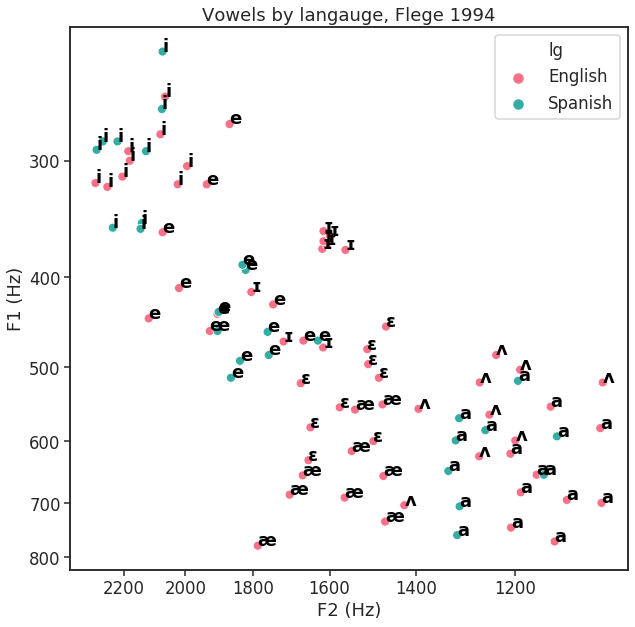

In [4]:
vowelplot(F94, color="lg", title="Vowels by langauge, Flege 1994",logscale=True)

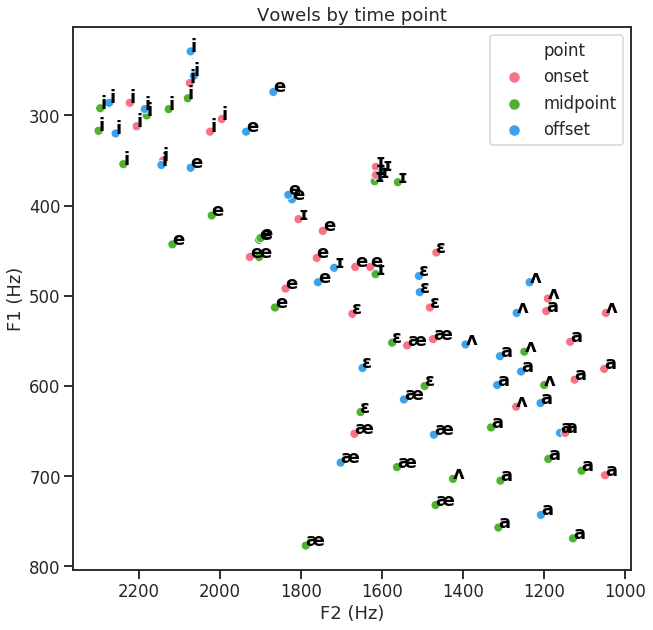

In [5]:
vowelplot(F94, color="point", title="Vowels by time point")

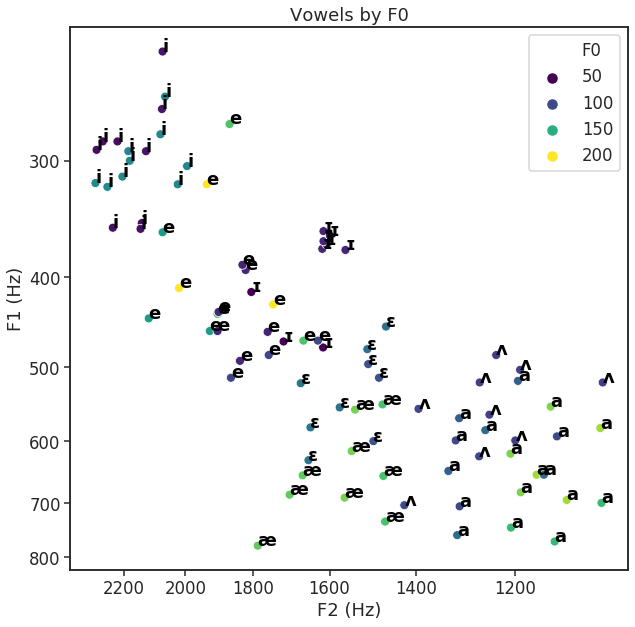

In [6]:
vowelplot(F94, color="F0", title="Vowels by F0",logscale=True)

## Normalizing data 
When you ran the cells in the "get the code set up" section, you also defined some code for normalizing data. 

There are two kinds of normalizing we'll consider:
- **Psychoacoustic normalizing** to convert Hz to Bark.
    - This is similar to using the log scale for the axes--I wouldn't do both!
    - This psychoacoustic scale is more similar to how we perceive sound
    - Using Bark values will produce a plot that looks more like the IPA vowel chart
- **Lobanov normalizing** to compare whole vowel systems
    - This type of normalizing only really works if you have *complete vowel spaces* 
    - We'll take the z-score of each formant relative to the some group, usually speaker
  
    
Let's try normaling the Flege 94 data both ways and visualizing the results


### Convert F1 and F2 to Bark using ```barkify```

- To use barkify, we need to give it the name of our data, and a list of the columns we want to convert
- In Python, a list goes withins square brackets ```[] ``` with each item separated by a comma
- The new columns will have 'z' in front of the number, instead of 'F,' for example

Let's try converting F1 and F2 of Flege 94 to Bark and visualizing the results

```
barkify(MY_DATA, ["formant","formant"...]
```


In [7]:
barkify(F94,["F1","F2"])
F94.head()

,lg,Vowel,Ss,point,VOT,dur,F0,F1,F2,F3,z1,z2
0,English,i,1,onset,10,119,131,312,2205,2726,3.151655,13.663529
1,English,i,1,midpoint,10,119,131,317,2299,2897,3.202442,13.941986
2,English,i,1,offset,10,119,131,320,2257,2829,3.232807,13.819104
3,English,i,2,onset,13,93,130,304,1995,2383,3.069929,12.993628
4,English,i,2,midpoint,13,93,130,281,2079,2516,2.831718,13.269948


#### Plot the data 
Be sure to add ```unit="Bark"```

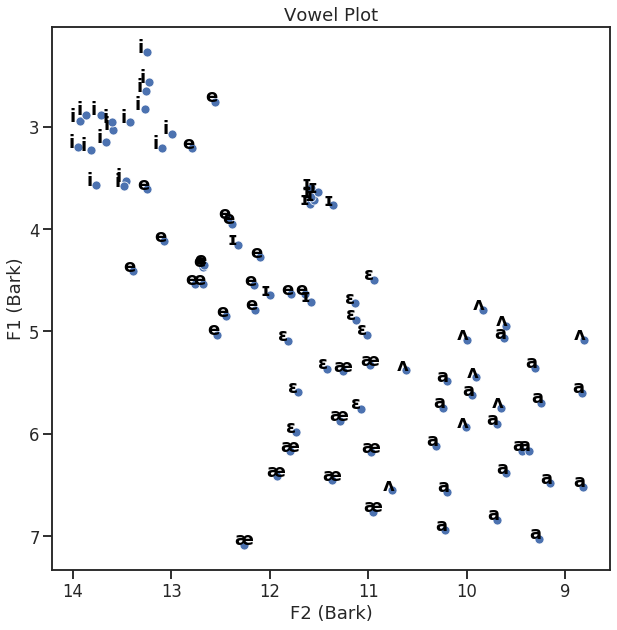

In [8]:
vowelplot(F94,F1="z1",F2="z2",unit="Bark")

### Lobanov normalize vowel spaces by Ss using ```Lobify```
Next, lets try normalizing the vowel spaces based on Ss so that we can compare the vowel spaces for each <br>
To use ```Lobify``` we need to specify:
- data: the data we want to transform
- group: the category we want to compare vowel spaces by
- formants: a list of the formant values we want to normalize

```Lobify(MY_DATA, group="GROUP", formants=["formant1","formant2"...]```

This will add a column for each formant with 'zsc' (for 'z-score') in front of the formant name.

#### Subsetting
Before we normalize the data, let's also subset it so that we're only looking at English<br>
Let's also only look at the midpoint of each vowel.<br>
This way we'll have just one F1 and F2 value for each Ss-vowel pair.

1 condition
```New_Data = Old_Data[Old_Data.Column=="Category To Keep"]```

2 or more conditions<br>
```New_Data = Old_Data[(Old_Data.Column=="Category To Keep") & Old_Data.SecondColumn=="Category To Keep"])```

In [9]:
F94_2 = F94[(F94.point=="midpoint") & (F94.lg=="English")]

In [10]:
Lobify(F94_2,group="Ss",formants=["F1","F2"])

,lg,Vowel,Ss,point,VOT,dur,F0,F1,F2,F3,z1,z2,zscF1,zscF2
1,English,i,1,midpoint,10,119,131,317,2299,2897,3.202442,13.941986,-1.519694,1.460488
4,English,i,2,midpoint,13,93,130,281,2079,2516,2.831718,13.269948,-1.507936,1.470892
7,English,i,3,midpoint,7,109,129,300,2180,2628,3.028850,13.587343,-1.343292,1.549074
10,English,ɪ,1,midpoint,11,123,73,476,1616,2571,4.708736,11.585481,-0.627125,-0.256825
13,English,ɪ,2,midpoint,5,94,85,373,1618,2393,3.756382,11.593695,-0.939370,0.147622
16,English,ɪ,3,midpoint,8,120,86,374,1561,2472,3.766033,11.355944,-0.883090,-0.121859
19,English,e,1,midpoint,12,119,140,443,2117,2531,4.412501,13.391209,-0.812375,1.002873
22,English,e,2,midpoint,4,88,161,438,1903,2474,4.366906,12.677204,-0.537666,0.965696
25,English,e,3,midpoint,7,114,195,411,2020,2508,4.117368,13.077085,-0.652989,1.117169
28,English,ɛ,1,midpoint,10,110,122,629,1653,2628,5.983515,11.735965,0.231763,-0.163793


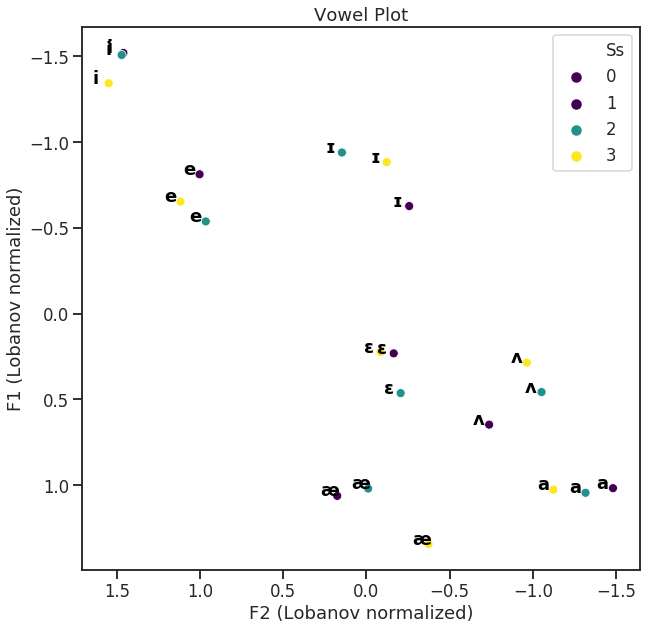

In [11]:
vowelplot(F94_2,F1="zscF1",F2="zscF2",unit="Lobanov normalized",color="Ss")